#    Ciência dos Dados - Projeto 1 
    

# Nome - Luigi Portugal Gouvêa Consonni


 <h3>- Variáveis escolhidas:</h3>
 <ol>
    <li>IDH</li>
  <li>Taxa de cresciemento populacional / ano</li>
  <li>Preço gasolina/Litro</li>
 </ol>
 <h3>- Pergunta norteadora:</h3>
    No mundo contemporâneo do século XXI já usufruímos e, continuamos a utilizar o petróleo como matéria prima para tornar o mundo cada vez mais tecnológico. Será que o preço da gasolina por litro em um país pode nos revelar algo sobre o índice de desenvolvimento do mesmo? E, como a taxa de crescimento populacional anual do país influencia ou não nesse desenvolvimento?

<h3>Explicação da pergunta norteadora </h3> <p> Com base em varias combinações de variáveis no Gapminder chamou minha atenção analisar se o preço de gasolina tem alguma relação com o indíce de desenvolvimento humano de um país, uma vez que tal preço esta sujeito a variações dependendo do estado econômico local e da demanda do produto.</p> 
<p>Para a escolha da taxa do crescimento populacional anual como variável deu-se por um racíocinio mais abstrato. Como estamos ficando cada vez mais dependentes da tecnologia é plausível afirmar que ocorreu e, ainda ocorre, uma susbtituição da mão de obra humana pelas máquinas e inteligencias artificiais quando há novos avanços tecnológicos. Desse modo, foi de meu interesse avaliar se tal crescimento ja esteve ou está ligado com o IDH uma vez que com os avanços tecnológicos a mão de obra humana é cada vez mais desnecessária e ineficiente.</p>


In [1]:
#importando bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#lendo os arquivos
dados_IDH = pd.read_excel("IDH.xlsx")
dados_gasL = pd.read_excel("gasolina-litro.xlsx")
dados_crescimentopop = pd.read_excel("crescimento_populacional_anual.xlsx")


In [3]:
#Selecionando colunas
idh_2012 = dados_IDH.loc[:,['IDH',2012]]
gasL_2012 = dados_gasL.loc[:,['gasolina/L',2012]]
crescpop_2012 = dados_crescimentopop.loc[:,['CrescPop',2012]]


In [4]:
#Colocando mesmo índice para todas as variavéis
idh_idx = idh_2012.set_index('IDH')
gasL_idx = gasL_2012.set_index('gasolina/L')
crescpop_idx = crescpop_2012.set_index('CrescPop')



In [5]:
#Juntando duas variaveis DataFrames
df = idh_idx.join(gasL_idx, how = 'inner',lsuffix ='_idh',rsuffix ='_US$gasolina/L')
#Renomeando
df1=df.rename(columns={'2012_idh':'IDH_2012','2012_US$gasolina/L':'US$ gasolina/L'})
crescpop_idxr = crescpop_idx.rename(columns={2012:'% crescimento populacional anual'})

#Juntando a ultima variavel
data = df1.join(crescpop_idxr, how ='inner')
data



,IDH_2012,US$ gasolina/L,% crescimento populacional anual
Afghanistan,0.470,1.280,3.2700
Albania,0.759,1.810,-0.1650
Algeria,0.737,0.290,2.0100
Andorra,0.843,1.670,-1.5900
Angola,0.523,0.630,3.5600
Antigua and Barbuda,0.781,NaN,1.1000
Argentina,0.823,1.460,1.0500
Armenia,0.736,1.250,0.2200
Australia,0.933,1.390,1.7900
Austria,0.887,1.810,0.4560


In [6]:
#Salvando para formato .CSV
datacsv = data.to_csv('Projeto1-Luigi_Portugal_2A', sep=',' ,encoding ='utf-8')
datacsv

<h3> Gráficos Scatter Plot - Comparando Variáveis </h3>

In [11]:
#Função que desenha a linha MMQ (retirado da aula 5)
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    # Calcula os coeficientes da reta de ajuste.
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    # Desenha o gráfico de dispersão e a reta de ajuste.
    min_X = dados_X.min()
    max_X = dados_X.max()

    plt.scatter(dados_X, dados_Y)  # dados.plot.scatter(x=variavel_X, y=variavel_Y) tambem serve!
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel(variavel_x)
    plt.ylabel(variavel_y)
    plt.grid(True)
    # Retorna os coeficientes de ajuste da reta.
    return a, b

,US$ gasolina/L,IDH_2012
US$ gasolina/L,1.000000,0.221694
IDH_2012,0.221694,1.000000


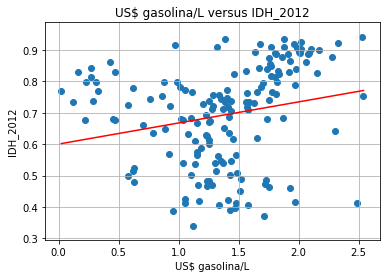

In [22]:

dispersao_com_reta(data, variavel_x="US$ gasolina/L", variavel_y="IDH_2012")
#plota coeficiente de correlação das variáveis x e y do gráfico
data.loc[:,['US$ gasolina/L','IDH_2012']].corr()

,% crescimento populacional anual,IDH_2012
% crescimento populacional anual,1.000000,-0.441754
IDH_2012,-0.441754,1.000000


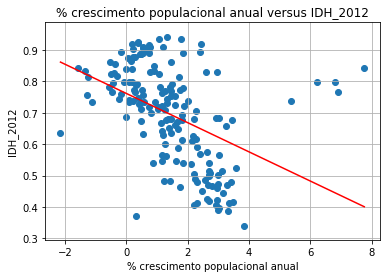

In [23]:
dispersao_com_reta(data, '% crescimento populacional anual', 'IDH_2012')
#plota coeficiente de correlação das variáveis x e y do gráfico
data.loc[:,['% crescimento populacional anual','IDH_2012']].corr()

,US$ gasolina/L,% crescimento populacional anual
US$ gasolina/L,1.000000,-0.401508
% crescimento populacional anual,-0.401508,1.000000


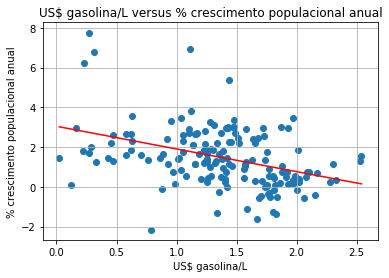

In [24]:
dispersao_com_reta(data, 'US$ gasolina/L','% crescimento populacional anual')
#plota coeficiente de correlação das variáveis x e y do gráfico
data.loc[:,['US$ gasolina/L','% crescimento populacional anual']].corr()

<h2>Conclusão:</h2>

<p> Com base na análise dos gráficos scatter plot juntamente com os respectivos coeficientes de correlação, observamos que o gráfico IDH_2012 x US$ gasolina/L apresenta um baixo coeficiente de correlação (0,22) isso nos revela que o preço por litro de gasolina não apresenta relação significativa com os indices de desenvolvimento humano dos países, assim provando que a hipótese elaborada na pergunta problema do projeto, de que quanto mais alto o IDH mais baixos os preços de gasolina no país, é parcialemente falha uma vez que, os únicos países quem seguem a lógica acima são justo os fornecedores de petróleo no mercado internacional.</p> <p> Já o gráfico IDH_2012 X % crescimento populacional anual tem coeficiente de correlação de -0,44, apesar de ser baixo indicando que as variaveis não tem relação significativa entre elas, com base na análise visual do gráfico podemos concluir que a hipótese proporcionada pela pergunta problema está correta, quanto maior o IDH menor a taxa de crescimento populacional anual de um país.
